In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastai
from pathlib import Path
from fastai.vision.transform import get_transforms
from fastai.vision.data import ObjectItemList, imagenet_stats
from fastai import *
from fastai.vision import *

import pdb
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler
from fastai.vision.data import ObjectCategoryList, ObjectItemList, imagenet_stats
from fastai.vision.image import ImageBBox
import torch
import torch
from torch import nn
import torch.nn.functional as F
import torch
from fastai.vision.learner import create_cnn
from torchvision.models import resnet34
import numpy as np
import json
import os
from pathlib import Path

from SSDObjectItemList import SSDObjectItemList
from SingleShotDetector import SingleShotDetector


In [3]:
ship_df = pd.read_csv("../ship_detection/data/ship_bounding_boxes.csv", converters={'cnrs':eval})
print(ship_df.shape)
ship_df['cnrs'] = ship_df.cnrs.apply(lambda x: [[*sub_x] for sub_x in x])
ship_df.set_index('fn', inplace=True)
ship_cnrs = ship_df['cnrs'].to_dict()
ship_cnrs_mod = {fn:[v, [1]* len(v)] for fn, v in ship_cnrs.items()}


(42556, 3)


In [12]:
keys_list = list(ship_cnrs_mod.keys())

In [13]:
keys_list[0], ship_cnrs_mod[keys_list[0]]

('000155de5.jpg', [[[465, 344, 501, 448]], [1]])

In [7]:
ship_dir = '../ship_detection/data/imgs'
train_image_dir = os.path.join(ship_dir, 'train_v2')

def getShipBboxes(fn): 
    return ship_cnrs_mod[os.path.basename(fn)]

data_ship = (SSDObjectItemList.from_folder(train_image_dir)
             .filter_by_func(lambda fname: ship_cnrs.get(os.path.basename(fname), None) is not None)
        .split_by_rand_pct()                          
        .label_from_func(getShipBboxes)
        .transform(get_transforms(), tfm_y=True, size=224)
        .databunch(bs=64, collate_fn=bb_pad_collate))   

In [18]:
ssd = SingleShotDetector(data_ship)

In [19]:
ssd.load('models/ssd1.pth')

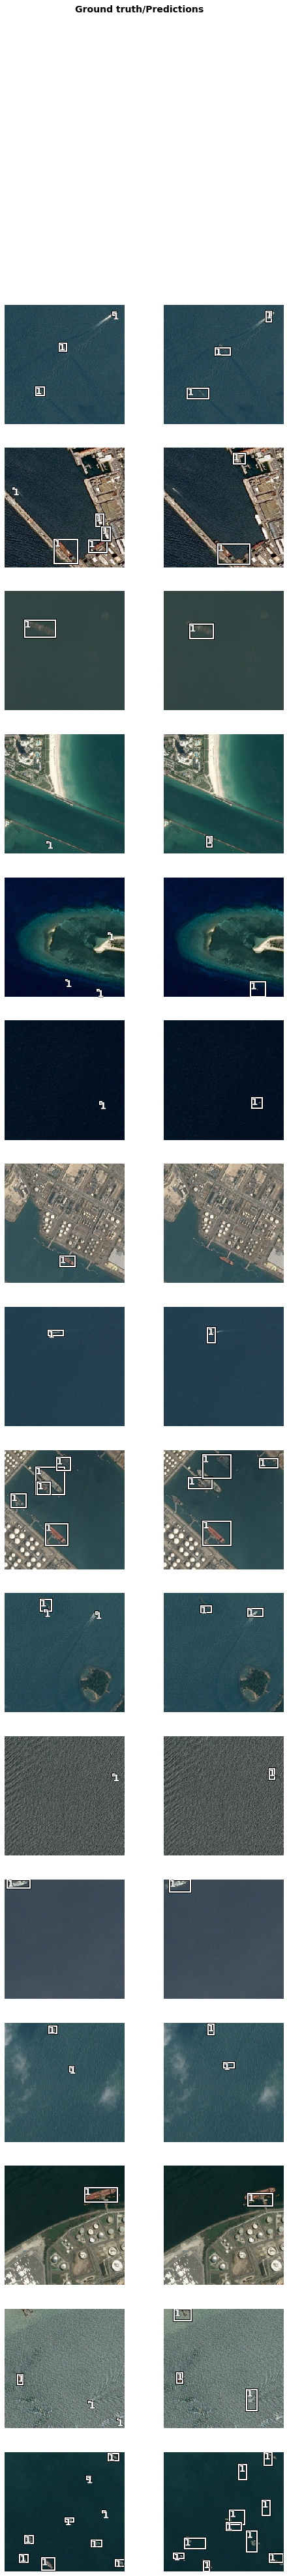

In [22]:
ssd.show_results(rows=16, thresh=0.2, ds_type=DatasetType.Valid)

In [ ]:
ssd.load('../input/ship-bboxes/ssd.pth')
ssd.learn.model_dir = '/kaggle/working'
ssd.fit(epochs=5)
ssd.save('/kaggle/working/ssd1.pth')
